In [30]:
!pip install torch torchvision
!git clone https://github.com/intel-isl/MiDaS.git

Cloning into 'MiDaS'...
remote: Enumerating objects: 622, done.
remote: Counting objects: 100% (244/244), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 622 (delta 185), reused 138 (delta 138), pack-reused 378 (from 2)
Receiving objects: 100% (622/622), 3.44 MiB | 14.60 MiB/s, done.
Resolving deltas: 100% (249/249), done.


In [31]:
import torch
import urllib.request
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

In [32]:
# Load MiDaS Model
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS")
midas.eval()

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Loading weights:  None


Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_main


MidasNet(
  (pretrained): Module(
    (layer1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inpla

In [33]:
# Image Transformation
transform = transforms.Compose([
    transforms.Resize((384, 384)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [34]:
# Add img
image_url = 'https://i.natgeofe.com/k/6d4021bf-832e-49f6-b898-27b7fcd7cbf7/eiffel-tower-ground-up_square.jpg'
image_path = '/content/MiDaS/your_image.jpg'
urllib.request.urlretrieve(image_url, image_path)

# Preprocess
img = Image.open(image_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0)

In [35]:
# Perform Depth Estimation
with torch.no_grad():
    prediction = midas(input_tensor)

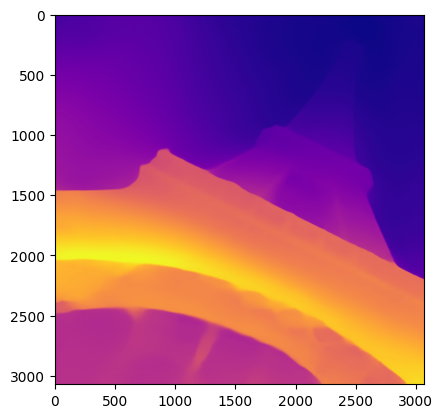

In [36]:
# Resize output
prediction_resized = torch.nn.functional.interpolate(
    prediction.unsqueeze(1),
    size=img.size[::-1],  # (height, width)
    mode="bicubic",
    align_corners=False,
).squeeze()

# Display
output = prediction_resized.cpu().numpy()
plt.imshow(output, cmap='plasma')
plt.axis('on')
plt.show()